In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os

In [37]:
DIR_NAME = 'curriculum-learning-stage'
STAGES = ['easy', 'med', 'hard', 'deberta']

logs = []
coarse_losses = []
fine_losses = []

def get_log_content():
    logs_by_fold = []
    for fold in range(0, 4):
        logs = []
        for stage in STAGES:
            filename = os.path.join(os.path.join(DIR_NAME, stage), f'{stage}-fold-{str(fold)}.txt')
            filecontent = open(filename, 'r').read()
            logs.append(filecontent)
        logs_by_fold.append(logs)
    return logs_by_fold

def get_coarse_losses(file_contents):
    losses_by_folds = []
    for fold in file_contents:
        losses = []
        for file_content in fold:
            losses.append(list(map(lambda x: float(x.strip('COARSE Train loss:  ')), file_content.split('\n')[0::2])))
        losses_by_folds.append(losses)
    return losses_by_folds
                      
def get_fine_losses(file_contents):
    losses_by_folds = []
    for fold in file_contents:
        losses = []
        for file_content in fold:
            losses.append(list(map(lambda x: float(x.strip('FINE Train loss:  ')), file_content.split('\n')[1::2])))
        losses_by_folds.append(losses)
    return losses_by_folds
                      
logs = get_log_content()
coarse_losses = get_coarse_losses(logs)
fine_losses = get_fine_losses(logs)

# deberta_log_file = 'deberta/deberta.txt'
# deberta_filecontent = open(deberta_log_file, 'r').read()

# deberta_coarse = get_coarse_losses([[deberta_filecontent]])
# deberta_fine = get_fine_losses([[deberta_filecontent]])

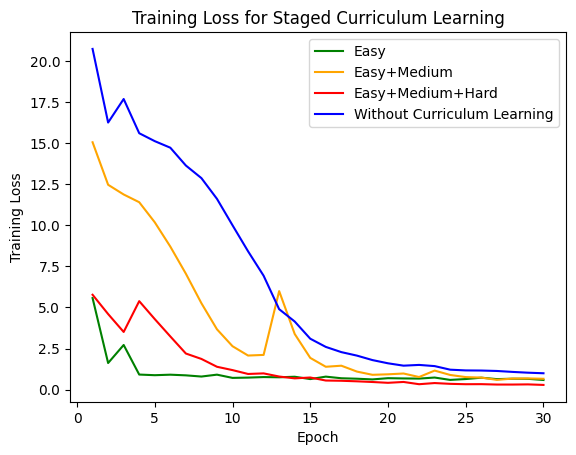

In [70]:
import matplotlib.pyplot as plt

# x_axis = ['value_1', 'value_2', 'value_3', ...]
# y_axis = ['value_1', 'value_2', 'value_3', ...]
x = list(range(1, 31))
# y1, y2, y3 = fine_losses

# plt.plot(x, y1, label='Easy')
# plt.plot(x, y2, label='Medium')
# plt.plot(x, y3, label='Hard')
# plt.plot(x, deberta_fine[0], label='Without Curriculum Learning')

fig.suptitle('Training Loss wrt Curriculum Learning')
stage_labels = ['Easy', 'Easy+Medium', 'Easy+Medium+Hard', 'Without Curriculum Learning']
colors = ['green', 'orange', 'red', 'blue']

fold=0

for stage in range(len(STAGES)):
    plt.plot(x, fine_losses[fold][stage], label=stage_labels[stage], color=colors[stage])

    
plt.title('Training Loss for Staged Curriculum Learning')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend()
plt.savefig('train-loss-curriculum.png')
plt.show()

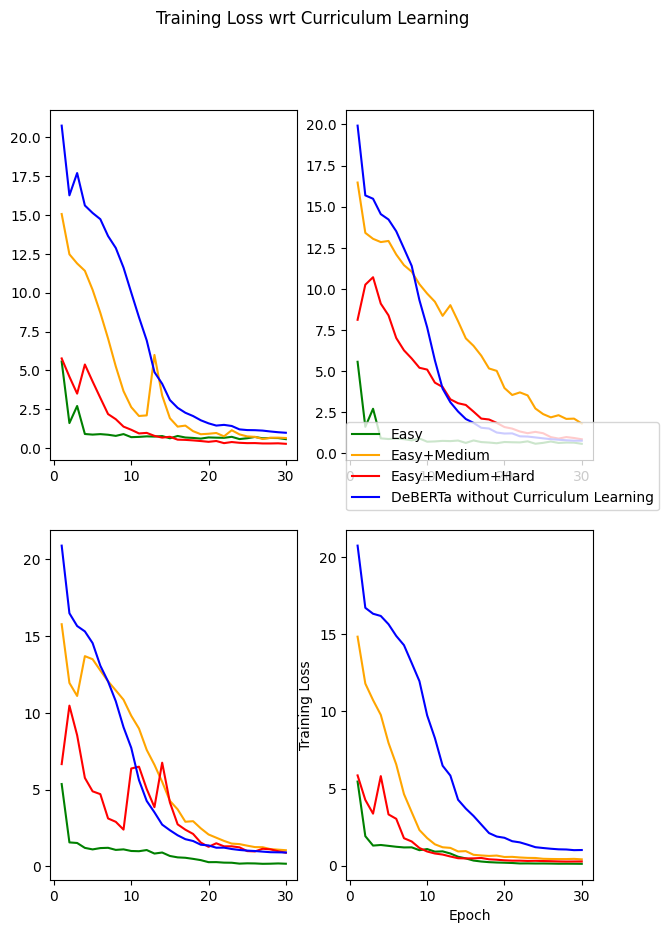

In [60]:
fig, axs = plt.subplots(2, 2, figsize=(7, 10))
fig.suptitle('Training Loss wrt Curriculum Learning')
stage_labels = ['Easy', 'Easy+Medium', 'Easy+Medium+Hard', 'DeBERTa without Curriculum Learning']
colors = ['green', 'orange', 'red', 'blue']
x = list(range(1, 31))
fold = 0
for ax1 in range(0, 2):
    for ax2 in range(0, 2):
        for stage in range(len(STAGES)):
            axs[ax1][ax2].plot(x, fine_losses[fold][stage], label=stage_labels[stage], color=colors[stage])
        fold +=1
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
# plt.legend(loc='upper right')
handles, labels = axs[1][1].get_legend_handles_labels()
fig.legend(handles, labels, loc='center right')
plt.show()


# axs[0].plot(x, y)
# axs[1].plot(x, -y)

In [18]:
list(map(lambda x: x.strip('FINE Train loss:  '), logs[0].split('\n')[1::2]))

['5.5711819967255',
 '1.6178756025619805',
 '2.71579165419098',
 '0.915957608143799',
 '0.8771754872286692',
 '0.9082438999321312',
 '0.8682589556556195',
 '0.7953525775810704',
 '0.9100713586667553',
 '0.7133568393765017',
 '0.730566821701359',
 '0.7636125717544928',
 '0.7497776602394879',
 '0.7833118881098926',
 '0.6403273927280679',
 '0.7897281305631623',
 '0.6912404593313113',
 '0.6629657903104089',
 '0.6208565927227028',
 '0.695555638812948',
 '0.6798295205226168',
 '0.670177589985542',
 '0.7344300513505004',
 '0.5900723152444698',
 '0.6434740791446529',
 '0.7258354154182598',
 '0.6385053171543404',
 '0.6628148251329549',
 '0.6562183801434003',
 '0.5855309301405214']